C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

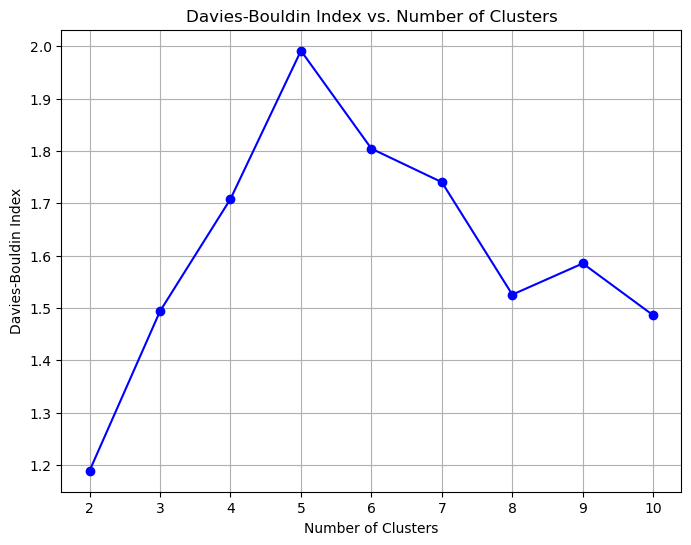

Optimal number of clusters: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


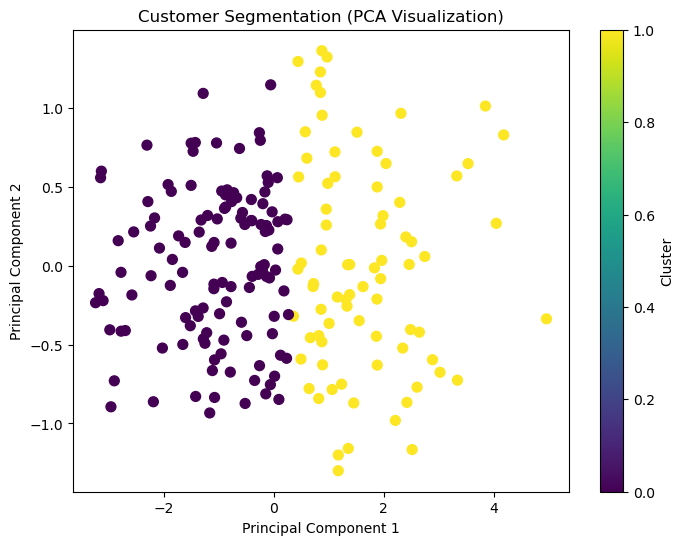

Customer segmentation results saved to 'Customer_Segments.csv'


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load and Merge Datasets
customers = pd.read_csv("C:/Users/madhu/Downloads/Customers.csv")
transactions = pd.read_csv("C:/Users/madhu/Downloads/Transactions.csv")
products = pd.read_csv("C:/Users/madhu/Downloads/Products.csv")

# Merge datasets to create customer-level data
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Step 2: Feature Engineering
# Aggregate data to create customer-level features
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",      # Total spend by the customer
    "Quantity": "sum",        # Total quantity purchased
    "ProductID": "nunique",   # Number of unique products purchased
    "Category": lambda x: x.mode()[0],  # Most purchased product category
    "Region": "first"         # Customer region
}).reset_index()

# One-hot encode categorical features (Region and Category)
customer_features = pd.get_dummies(customer_features, columns=["Region", "Category"])

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ["TotalValue", "Quantity", "ProductID"]
customer_features[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

# Step 3: Apply Clustering (KMeans Example)
# Determine the optimal number of clusters using DBI
dbi_scores = []
cluster_range = range(2, 11)  # Evaluate clusters from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features.drop("CustomerID", axis=1))
    dbi = davies_bouldin_score(customer_features.drop("CustomerID", axis=1), labels)
    dbi_scores.append(dbi)

# Plot DBI scores to select the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, dbi_scores, marker='o', linestyle='-', color='b')
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid()
plt.show()

# Choose the optimal number of clusters (e.g., the one with the lowest DBI)
optimal_k = cluster_range[np.argmin(dbi_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Final Clustering with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans.fit_predict(customer_features.drop("CustomerID", axis=1))
customer_features["Cluster"] = final_labels

# Step 4: Visualize Clusters (PCA for Dimensionality Reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(customer_features.drop(["CustomerID", "Cluster"], axis=1))
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=customer_features["Cluster"], cmap="viridis", s=50)
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Step 5: Save Clustering Results
# Save customer cluster assignments to a CSV file
customer_features[["CustomerID", "Cluster"]].to_csv("Customer_Segments.csv", index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

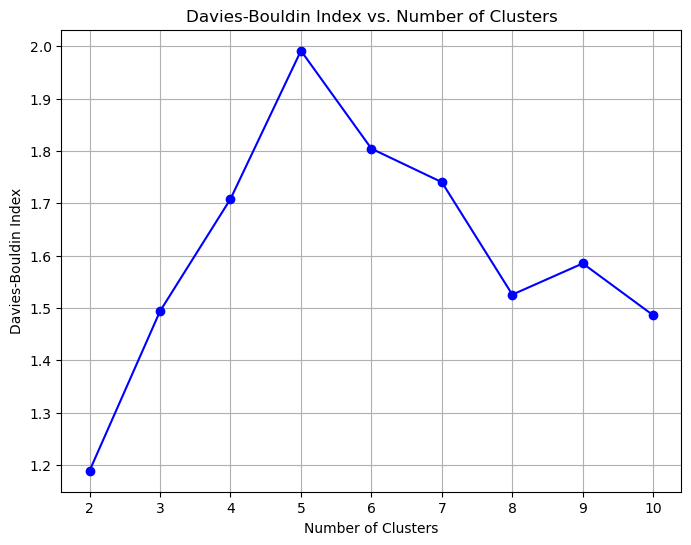

Optimal number of clusters: 2


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


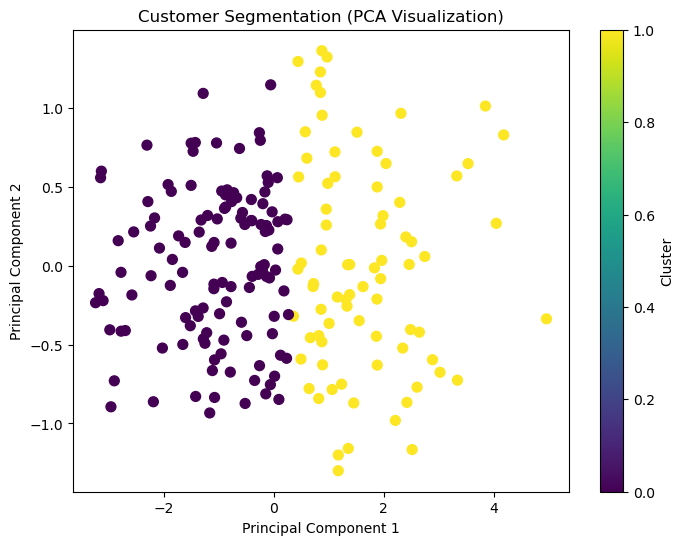

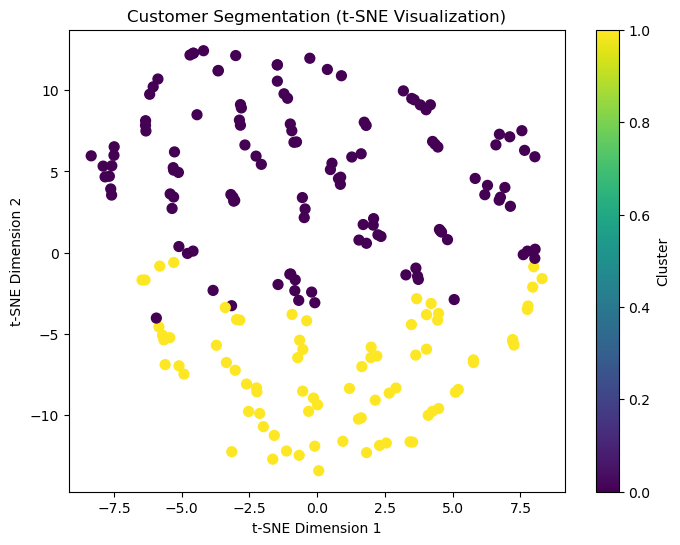

Customer segmentation results saved to 'Customer_Segments.csv'


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Load and Merge Datasets
customers = pd.read_csv("C:/Users/madhu/Downloads/Customers.csv")
transactions = pd.read_csv("C:/Users/madhu/Downloads/Transactions.csv")
products = pd.read_csv("C:/Users/madhu/Downloads/Products.csv")

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Step 2: Feature Engineering
customer_features = merged_data.groupby("CustomerID").agg({
    "TotalValue": "sum",      # Total spend by the customer
    "Quantity": "sum",        # Total quantity purchased
    "ProductID": "nunique",   # Number of unique products purchased
    "Category": lambda x: x.mode()[0],  # Most purchased product category
    "Region": "first"         # Customer's region
}).reset_index()

# One-hot encode categorical features (Region and Category)
customer_features = pd.get_dummies(customer_features, columns=["Region", "Category"])

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ["TotalValue", "Quantity", "ProductID"]
customer_features[numerical_columns] = scaler.fit_transform(customer_features[numerical_columns])

# Step 3: Apply Clustering (KMeans Example)
# Determine the optimal number of clusters using DBI
dbi_scores = []
cluster_range = range(2, 11)  # Evaluate clusters from 2 to 10
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_features.drop("CustomerID", axis=1))
    dbi = davies_bouldin_score(customer_features.drop("CustomerID", axis=1), labels)
    dbi_scores.append(dbi)

# Plot DBI scores to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, dbi_scores, marker='o', linestyle='-', color='b')
plt.title("Davies-Bouldin Index vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.grid()
plt.show()

# Select the optimal number of clusters (lowest DBI)
optimal_k = cluster_range[np.argmin(dbi_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Final Clustering with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = kmeans.fit_predict(customer_features.drop("CustomerID", axis=1))
customer_features["Cluster"] = final_labels

# Step 4: Visualize Clusters (PCA and t-SNE)
# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(customer_features.drop(["CustomerID", "Cluster"], axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=customer_features["Cluster"], cmap="viridis", s=50)
plt.title("Customer Segmentation (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# t-SNE for Advanced Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_features = tsne.fit_transform(customer_features.drop(["CustomerID", "Cluster"], axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=customer_features["Cluster"], cmap="viridis", s=50)
plt.title("Customer Segmentation (t-SNE Visualization)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

# Step 5: Save Clustering Results
# Save customer cluster assignments to a CSV file
customer_features[["CustomerID", "Cluster"]].to_csv("Customer_Segments.csv", index=False)
print("Customer segmentation results saved to 'Customer_Segments.csv'")
